In [33]:
from datetime import datetime, timedelta
from faker import Faker 
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
import openpyxl
import seaborn as sns
import numpy as np

fake = Faker()

dt_specie = pd.read_excel("C:/Users/Sonya/Documents/Практика/Jupyter/specie_data.xlsx")

In [2]:
dt_specie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         75 non-null     object 
 1   Adult height    75 non-null     float64
 2   Child's height  75 non-null     float64
 3   Adult weight    75 non-null     float64
 4   Child's weight  75 non-null     float64
 5   Lifespan        75 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [3]:
dt_specie.to_numpy()

array([['Chinese Alligator', 220.0, 44.0, 45.0, 4.5, 50],
       ['Venezuelan Amazon', 41.0, 8.2, 0.34, 0.034, 60],
       ['Yellow-faced Amazon', 37.0, 7.4, 0.34, 0.034, 50],
       ['Blue-faced Amazon', 54.5, 10.9, 0.52, 0.052, 70],
       ['White-tailed wildebeest', 120.0, 24.0, 170.0, 17.0, 20],
       ['Black Antelope', 90.0, 18.0, 170.0, 17.0, 20],
       ['Red Macaw', 90.0, 18.0, 1.25, 0.125, 80],
       ['Yellow macaw', 147.0, 29.4, 1.3, 0.13, 50],
       ['Big cormorant', 100.0, 20.0, 3.0, 0.3, 20],
       ['Snow leopard (Snow Leopard)', 120.0, 24.0, 30.0, 3.0, 20],
       ['Panamanian Psalmopeus', 23.0, 4.6, 0.15, 0.015, 15],
       ['Golden Eagle', 93.0, 18.6, 5.0, 0.5, 50],
       ['Ordinary beaver', 80.0, 16.0, 30.0, 3.0, 20],
       ['Bristly Armadillo', 38.0, 7.6, 0.9, 0.09, 16],
       ['Vicuna', 150.0, 30.0, 50.0, 5.0, 20],
       ['Mexican Venomous tooth', 90.0, 18.0, 45.0, 4.5, 30],
       ['Raven', 70.0, 14.0, 0.14, 0.014, 40],
       ['Horned Raven', 115.0, 23.0, 6

In [4]:
def generate_date(start_date, end_date):
    return fake.date_time_between(start_date=start_date, end_date=end_date)


def create_file(file_path, header, data_generator, num_rows):
    with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
        workbook  = writer.book
        worksheet = workbook.add_worksheet()
        worksheet.write_row(0, 0, header)
        for i in range(num_rows):
            row_data = data_generator(i)
            worksheet.write_row(i + 1, 0, row_data)
            


def create_animals_row(row_id):
    if num_species[0] != 0:
        num_species[0] -= 1
    else:
        if num_species[1] == len(dt_specie) - 1:
            num_species[1] = 0
        else:
            num_species[1] += 1
            num_species[0] = numb_per_species

    entry_date_end = datetime.now()
    entry_date_start = entry_date_end - timedelta(days=int(dt_specie["Lifespan"][num_species[1]] * 365))
    entry_date = generate_date(entry_date_start, entry_date_end)
    difference = datetime.now() - entry_date
    height = 0
    weight = 0

    if (difference > timedelta(days=int(dt_specie["Lifespan"][num_species[1]] * 110))):
        maturity = True
        height = round(random.uniform(dt_specie["Child's height"][num_species[1]], dt_specie['Adult height'][num_species[1]]), 2)
        weight = round(random.uniform(dt_specie["Child's weight"][num_species[1]], dt_specie['Adult weight'][num_species[1]]), 2)
    else:
        maturity = False
        height = round(random.uniform(1.0, dt_specie["Child's height"][num_species[1]]), 2)
        weight = round(random.uniform(1.0, dt_specie["Child's weight"][num_species[1]]), 2)

    gender = random.choice(["Самец", "Самка"])
    return [fake.name().split()[0],entry_date.strftime('%Y-%m-%dT%H:%M:%S') , dt_specie['Species'][num_species[1]], maturity, weight, height, gender]



In [5]:
your_path = 'C:/Users/Sonya/Documents/Практика/Jupyter/'
numb_per_species = 7
num_species = [numb_per_species,0]
num_rows = 490

In [6]:
animals_file_path = your_path + 'Animval.xlsx'
create_file(animals_file_path, ["Кличка", "Дата появления", "Вид","Зрелость", "Вес", "Рост", "Пол"],
            create_animals_row, num_rows)

In [7]:
dt_gd = pd.read_excel("C:/Users/Sonya/Documents/Практика/Jupyter/Animval.xlsx", )

In [8]:
dt_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Кличка          490 non-null    object 
 1   Дата появления  490 non-null    object 
 2   Вид             490 non-null    object 
 3   Зрелость        490 non-null    bool   
 4   Вес             490 non-null    float64
 5   Рост            490 non-null    float64
 6   Пол             490 non-null    object 
dtypes: bool(1), float64(2), object(4)
memory usage: 23.6+ KB


In [9]:
dt_gd.head(3)

,Кличка,Дата появления,Вид,Зрелость,Вес,Рост,Пол
0,Brendan,2017-11-25T17:45:49,Chinese Alligator,False,2.20,6.57,Самка
1,Candace,1995-04-28T07:24:18,Chinese Alligator,True,35.71,174.97,Самец
2,Cody,1995-03-22T01:38:07,Chinese Alligator,True,18.86,191.30,Самка


In [10]:
dt_gd.tail(3)

,Кличка,Дата появления,Вид,Зрелость,Вес,Рост,Пол
487,James,2023-07-05T21:26:43,White-breasted hedgehog,False,0.98,4.80,Самец
488,Brittany,2023-07-08T09:48:53,White-breasted hedgehog,False,0.95,3.72,Самка
489,Tyler,2021-10-07T00:01:07,White-breasted hedgehog,True,0.73,7.43,Самец


In [11]:
dt_gd.describe()

,Вес,Рост
count,490.000000,490.000000
mean,6.510245,44.809449
std,19.078376,46.006651
min,0.010000,1.020000
25%,0.410000,13.527500
50%,0.900000,32.620000
75%,2.527500,60.582500
max,167.780000,338.650000


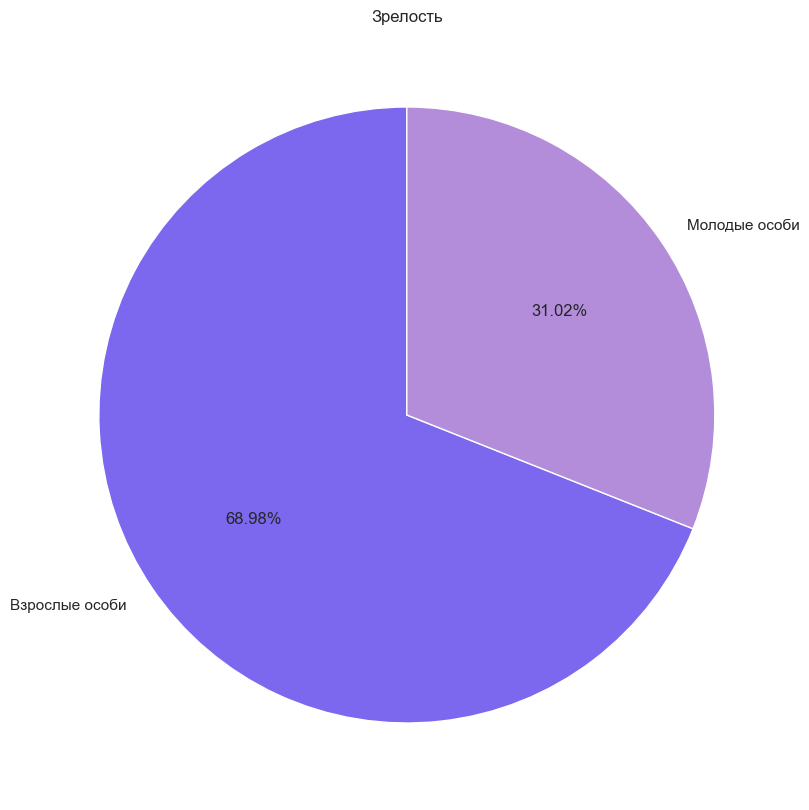

In [67]:
mature_counts = dt_gd['Зрелость'].value_counts()

mature_counts = dt_gd['Зрелость'].value_counts()
label_mapping = {True: 'Взрослые особи', False: 'Молодые особи'}
mature_counts.index = mature_counts.index.map(label_mapping)

plt.figure(figsize=(10, 10), facecolor='White')
plt.pie(mature_counts, labels=mature_counts.index, autopct='%1.2f%%', startangle=90, colors=['#7b68ee', '#b38dd9'])
plt.title('Зрелость')
plt.show()

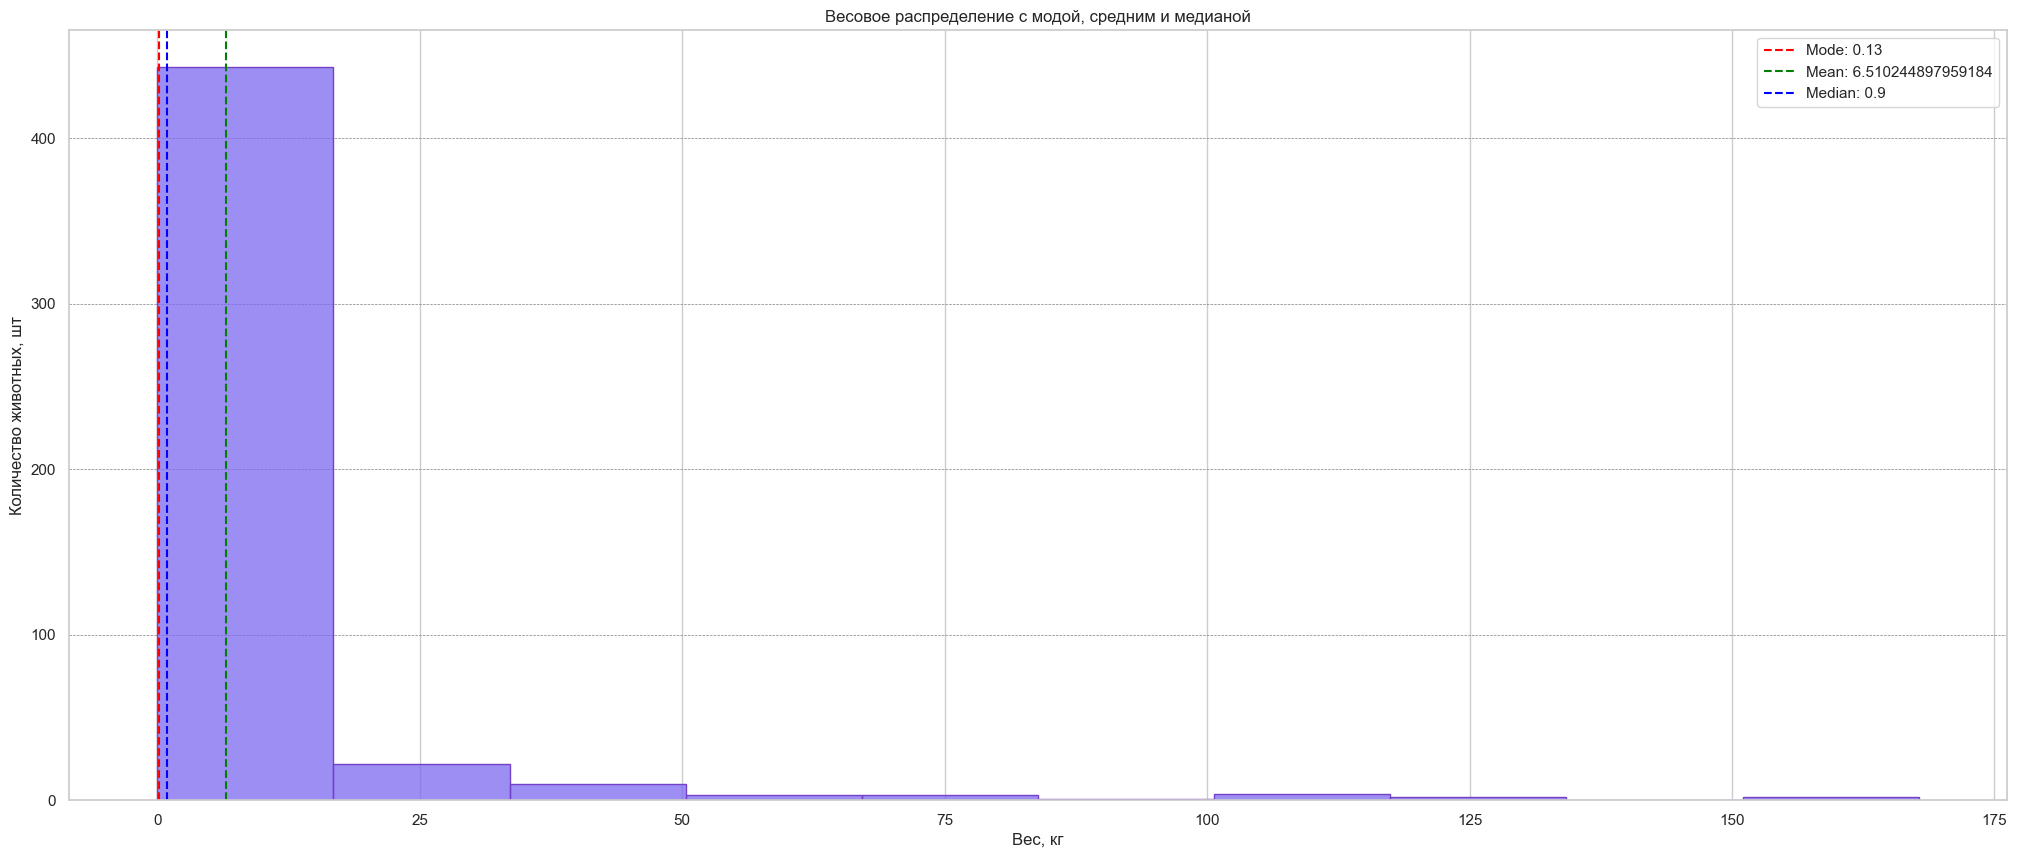

In [63]:
# Устанавливаем стиль
sns.color_palette("flare", as_cmap=True)
sns.set(style="whitegrid")

# Создаем график
plt.figure(figsize=(25, 10))

# Создаем гистограмму с заданием цвета и границ
sns.histplot(dt_gd["Вес"], bins=10, color='#7b68ee', edgecolor='#7442c8')

# Добавление моды, среднего значения и медианы как линий на график
mode_value = dt_gd['Вес'].mode()[0]
mean_value = dt_gd['Вес'].mean()
median_value = dt_gd['Вес'].median()
plt.axvline(mode_value, color='red', linestyle='--', label=f'Mode: {mode_value}')
plt.axvline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value}')
plt.axvline(median_value, color='blue', linestyle='--', label=f'Median: {median_value}')
plt.legend()

# Добавляем сетку
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Настройка заголовка и меток осей
plt.title("Весовое распределение с модой, средним и медианой")
plt.xlabel("Вес, кг")
plt.ylabel("Количество животных, шт")

# Отображаем график
plt.show()

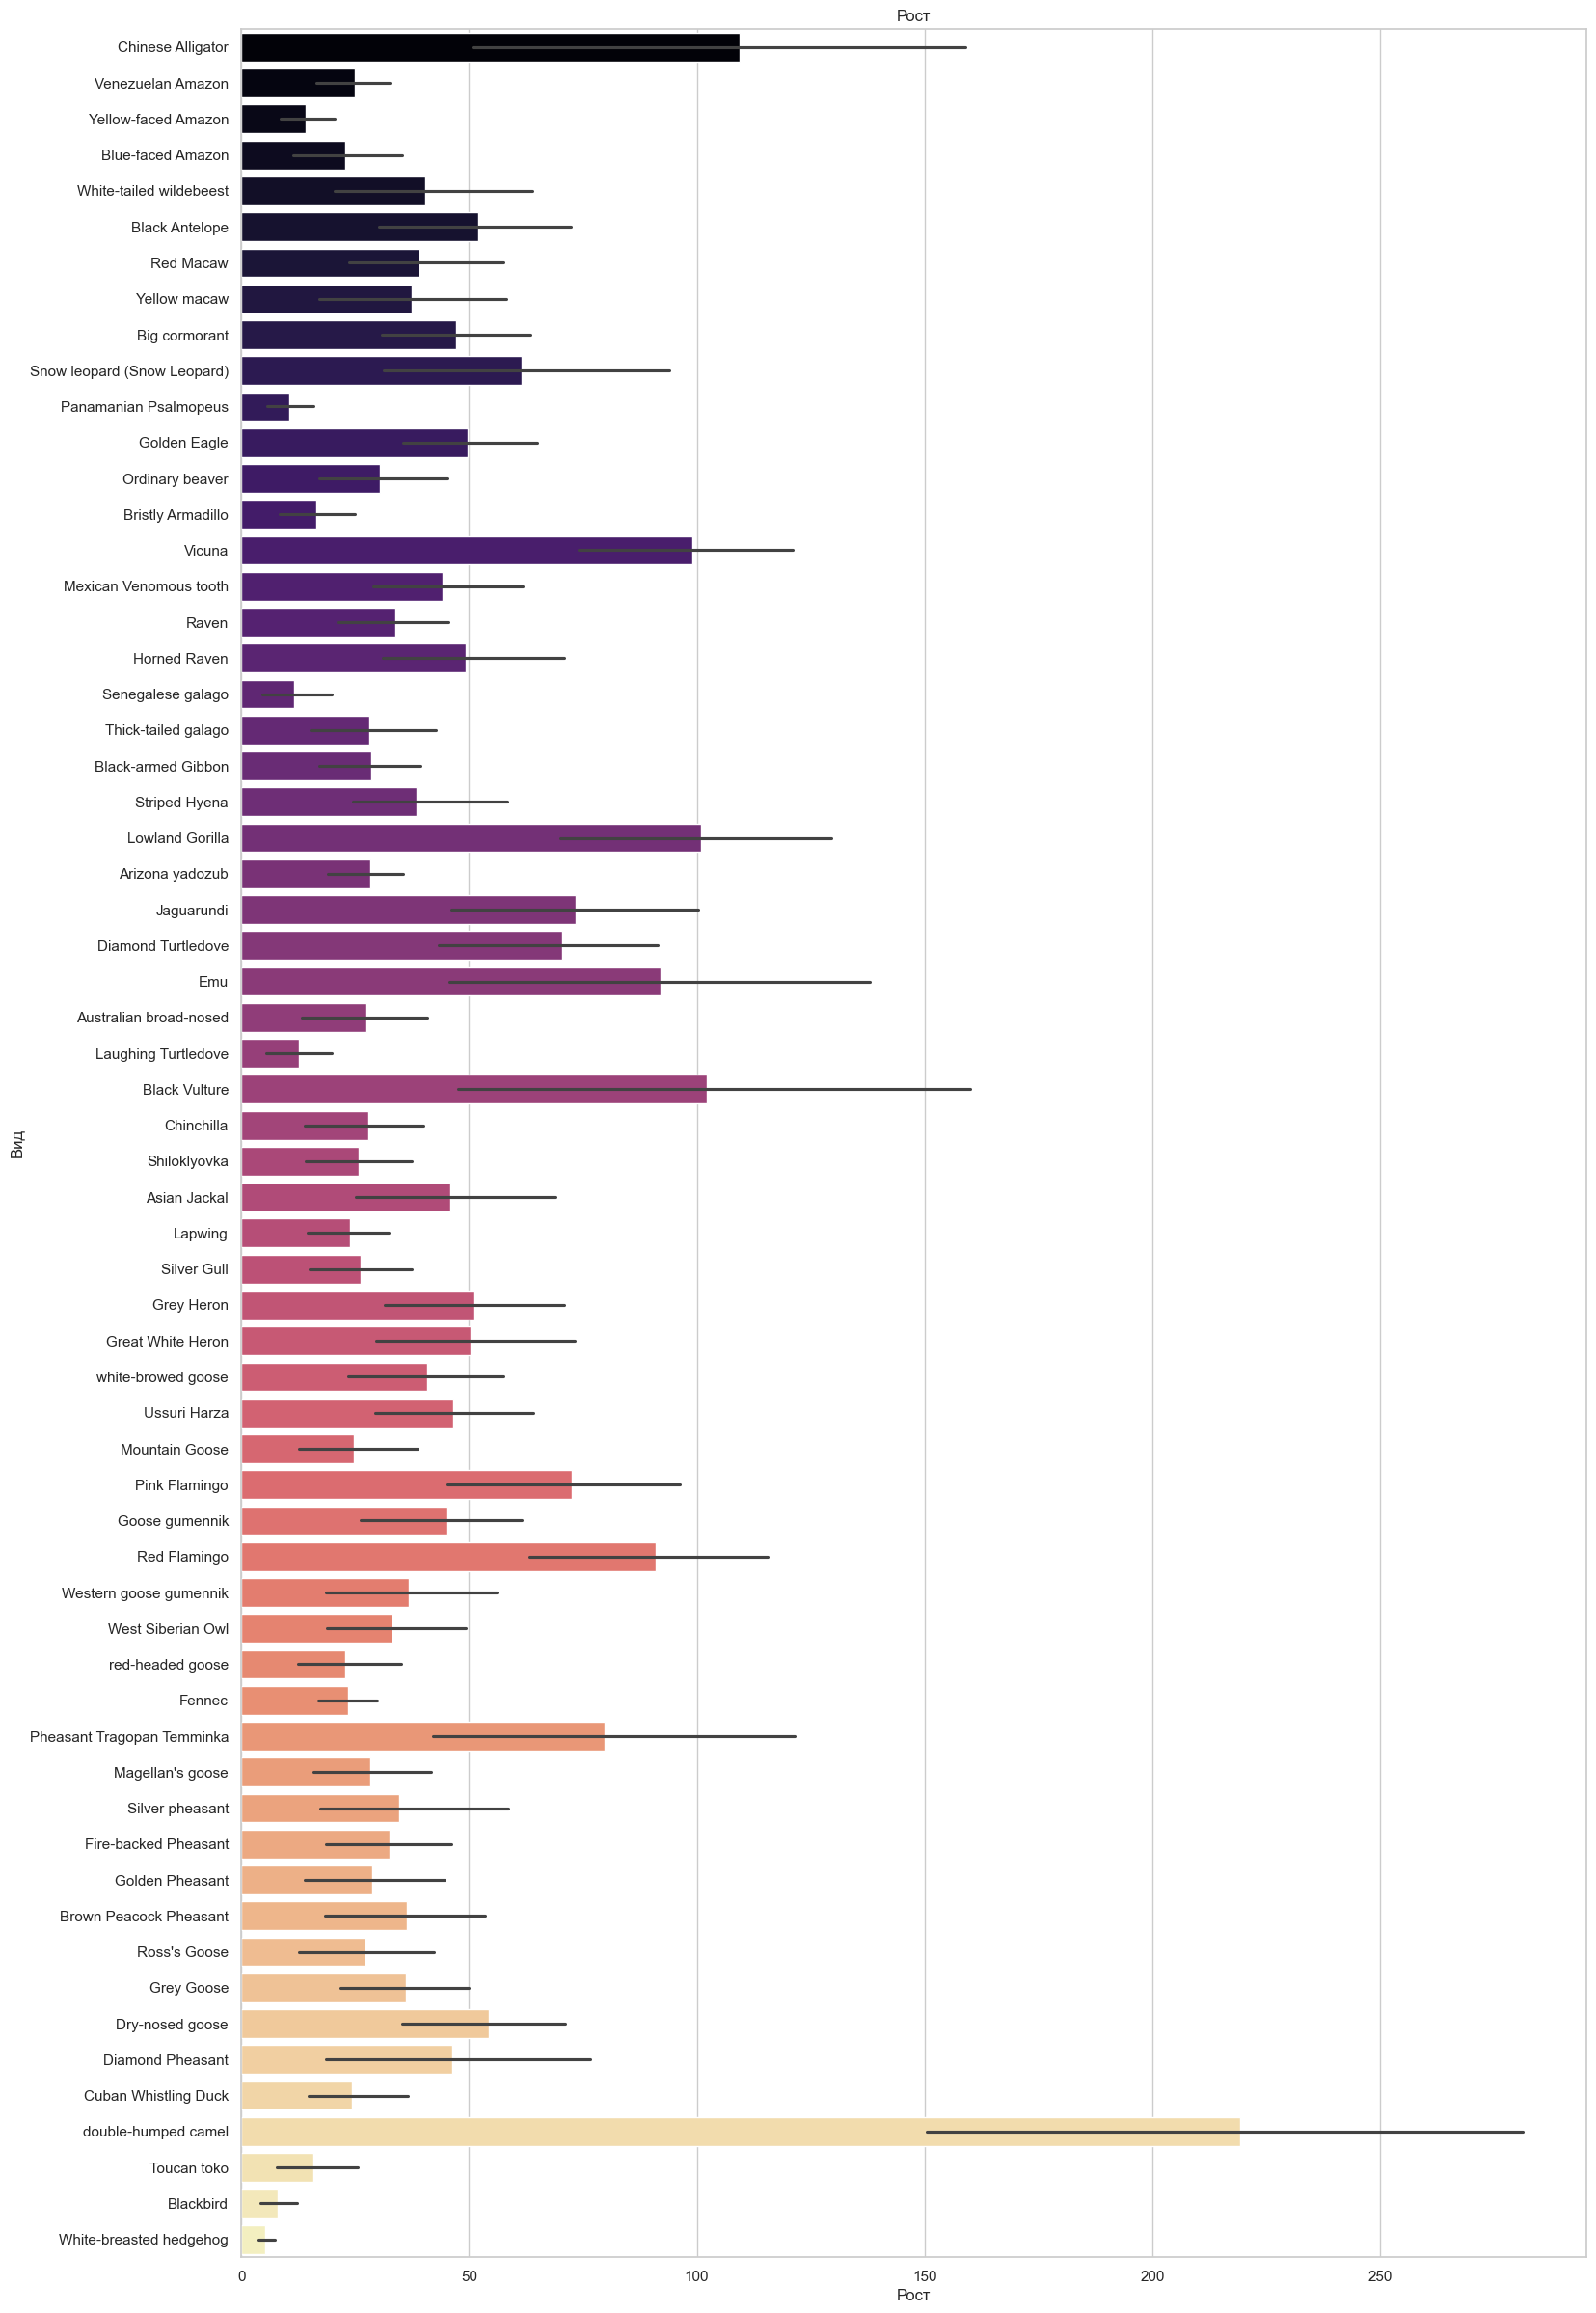

In [43]:
sns.color_palette("magma", as_cmap=True)
sns.set(style="whitegrid")

plt.figure(figsize=(18, 30))
sns.barplot(y='Вид', x='Рост', hue='Вид', data=dt_gd, palette="magma")
# Настройка меток и подписей осей
plt.title('Рост')
plt.ylabel('Вид')
plt.xlabel('Рост')
plt.show()